# Coursera ML Exercise 1

In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import pandas
import os

## 2 Linear regression with one variable

<IPython.core.display.Javascript object>


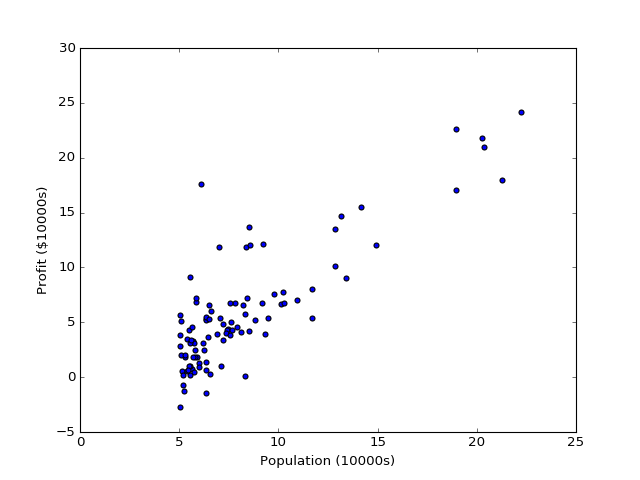

In [19]:
data_food_trucks = pandas.read_table("ex1data1.txt", sep = ',', header=None, names=['population', 'profit'])

pop, profit = data_food_trucks.population, data_food_trucks.profit

food_truck_scatter = plt.figure()
food_truck_scatter_ax = food_truck_scatter.add_subplot(111)
food_truck_scatter_ax.scatter(pop, profit)
plt.xlabel("Population (10000s)")
plt.ylabel("Profit ($10000s)")


In [30]:
X = pop.as_matrix()
X = np.vstack((np.ones(len(X)), X))
y = profit.as_matrix()

In [4]:
theta = np.zeros(2)

iterations = 1500
alpha = 0.01

### 2.2.3 Computing the cost $J(\theta)$

Cost function given as:

$$\large J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} \big( h_{\theta}(x^{(i)}) - y^{(i)} \big)^2  $$

Where hypothesis function is $$ \large h_{\theta}(x) = \theta^{T}x = \theta_0 + \theta_{1}x_1 $$

In [5]:
def computeCost(X, y, theta):
    """Computes cost function for given data X and y and parameters theta.
    Implemented using numpy matrix multiplication
    """
    m = len(y)
    h_theta = np.dot(theta.T, X) # vector of all predictions
    J = np.sum((h_theta - y) * (h_theta - y)) / (2*m)
    return J
    

In [6]:
computeCost(X, y, theta)

32.072733877455676

### 2.2.4 Gradient Descent

Update equation given as:

$$ \large \theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m} \big( h_{\theta}(x^{(i)} - y^{(i)} \big) x_{j}^{(i)}  $$

(We're summing each difference times each $x^{(i)}$ for each row $j$ (for each feature). Essentially it's the same as summing elements of the vector equal to the element-wise product of the difference and the $j$-th row of $x$)

In [7]:
def updateParams(X, y, alpha, theta):
    """Given an old theta vector, computes and returns an updated theta vector"""
    new_theta = np.zeros_like(theta) # initialize new theta vector
    for j in range(len(new_theta)):
        m = len(y)
        h_theta = np.dot(theta.T, X) # vector of all predictions
        new_theta[j] = theta[j] - (alpha/m) * np.sum((h_theta - y) * X[j])
    return new_theta
        

In [8]:
def gradient_descent(X, y, alpha, iterations=1500):
    """Performs gradient descent on training examples y and features X,
    with learning rate alpha and some number of iterations. Returns output
    theta, where theta is a vector of length X.rows. """
    theta = np.zeros(X.shape[0]) # number of rows in X. 
    for i in range(iterations):
        theta = updateParams(X, y, alpha, theta)
    return theta

In [9]:
model = gradient_descent(X, y, alpha, iterations)

<IPython.core.display.Javascript object>


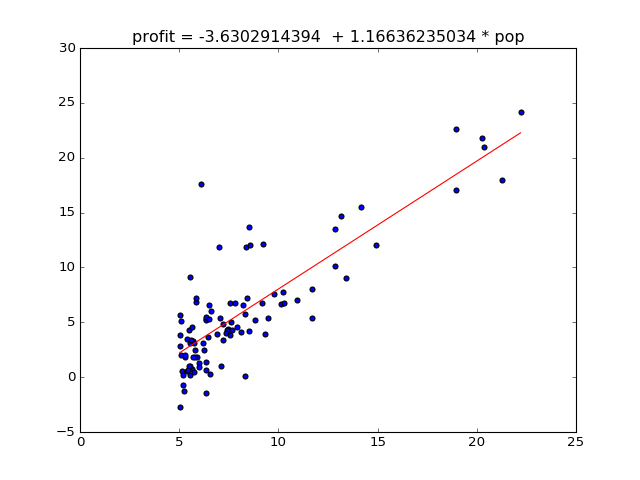

In [45]:
model_plot = plt.figure()
model_plot_ax = model_plot.add_subplot(111)


model_plot_ax.scatter(pop, profit)
plot_x = np.linspace(min(pop), max(pop), 1000)
plot_y = np.apply_along_axis(lambda x: model[0] + model[1] * x, 0, plot_x)
model_plot_ax.plot(plot_x, plot_y, color = 'red')

plt.title("profit = " + str(model[0]) + "  + " + str(model[1]) + " * pop")



### 2.4 Visualizing $J(\theta)$


<IPython.core.display.Javascript object>


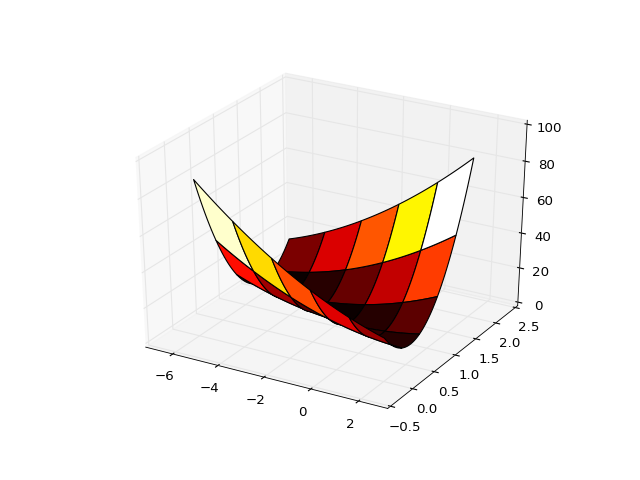

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

loss_plot = plt.figure()
ax = loss_plot.gca(projection='3d')
plt.hold(True)
theta_0 = np.linspace(-6 ,2)
theta_1 = np.linspace(0, 2)

theta_0, theta_1 = np.meshgrid(theta_0, theta_1)
j = np.array([computeCost(X, y, np.array([t_0, t_1])) for t_0, t_1 in zip(np.ravel(theta_0), np.ravel(theta_1))])
# compute all values of j
j = j.reshape(theta_0.shape)

ax.scatter(np.array([model[0]]), np.array([model[1]]), computeCost(X, y, model), c="white")
ax.plot_surface(theta_0, theta_1, j, cmap = cm.hot)

plt.show()

## 3 Linear regression with multiple variables

<IPython.core.display.Javascript object>


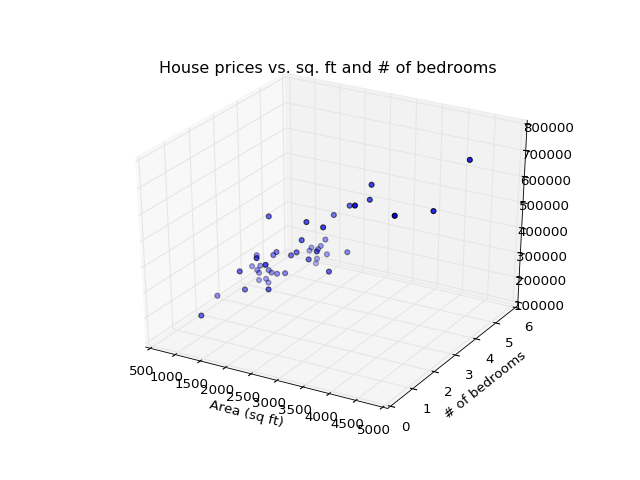

In [29]:
data_houses = pandas.read_table("ex1data2.txt", sep=',', header=None, names=['area', 'bedrooms', 'price'])

area, bedrooms, price = np.array(data_houses.area), np.array(data_houses.bedrooms), np.array(data_houses.price)

houses_scatter = plt.figure()

ax = houses_scatter.gca(projection='3d')
ax.scatter(area, bedrooms, price)
plt.title("House prices vs. sq. ft and # of bedrooms")
plt.xlabel("Area (sq ft)")
plt.ylabel("# of bedrooms")
plt.show()


### 3.1 Feature Normalization

2000.68085106 3.17021276596 786.202618743 0.752842809062


<IPython.core.display.Javascript object>


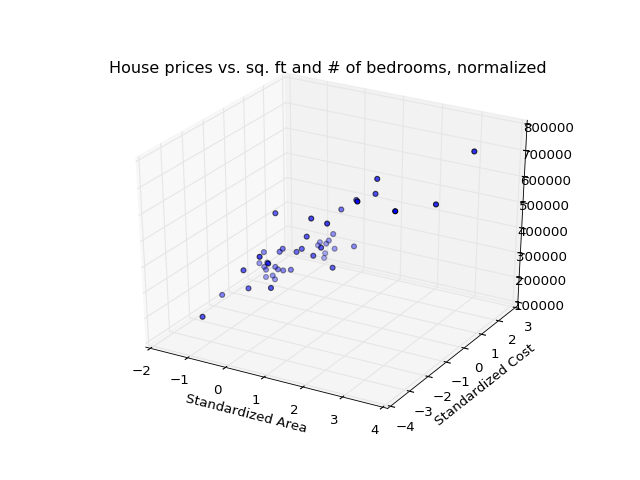

In [57]:
mean_area = np.mean(area)
mean_bedrooms = np.mean(bedrooms)
stdev_area = np.std(area)
stdev_bedrooms = np.std(bedrooms)

print(mean_area, mean_bedrooms, stdev_area, stdev_bedrooms)

area_norm = (area - mean_area) / stdev_area
bedrooms_norm = (bedrooms - mean_bedrooms) / stdev_bedrooms

houses_scatter_norm = plt.figure()

ax = houses_scatter_norm.gca(projection='3d')
ax.scatter(area_norm, bedrooms_norm, price)
plt.title("House prices vs. sq. ft and # of bedrooms, normalized")
plt.xlabel("Standardized Area")
plt.ylabel("Standardized Cost")
plt.show()


In [58]:
house_X = np.vstack((np.ones(len(area_norm)), area_norm, bedrooms_norm))
house_y = price

house_model = gradient_descent(house_X, house_y, alpha, iterations)


<IPython.core.display.Javascript object>


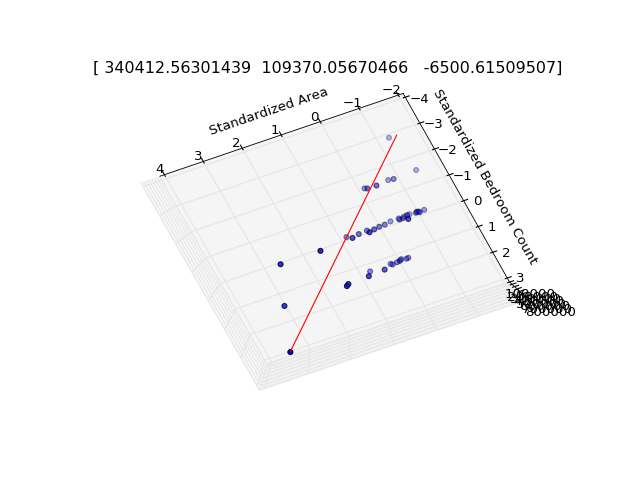

In [59]:
houses_scatter_model = plt.figure()

ax = houses_scatter_model.gca(projection='3d')
plt.hold(True)
ax.scatter(area_norm, bedrooms_norm, price)

house_plot_x = np.linspace(min(area_norm), max(area_norm), 1000)
house_plot_y = np.linspace(min(bedrooms_norm), max(bedrooms_norm), 1000)
house_plot_z = [house_model[0] + house_model[1] * x + house_model[2] * y for x, y in zip(house_plot_x, house_plot_y)]

ax.plot(house_plot_x, house_plot_y, house_plot_z, color='red')

plt.title(house_model)
plt.xlabel("Standardized Area")
plt.ylabel("Standardized Bedroom Count")
# plt.title("price = "+ str(house_model[0]) + str(house_model[1]) + "* SD sq. ft" + str(house_model[2]) + "* SD # bedrooms")
plt.show()